# Introduccion a R: Graficas
## Angelo Gutierrez Daza
### Programacion II
#### Codigo probado utilizando la version 1.2.0-2 de Julia Pro

- En Julia existen varias librerias para realizar figuras de forma rapida
- La libreria estandar mas conocida es "Plots"
- Varios de estos ejemplos son tomados de la documentacion de Plots y de la galeria de figuras de "goropikari" y mantenida en
https://goropikari.github.io/PlotsGallery.jl/


In [1]:
filePath = @__DIR__
cd(filePath)
pwd()

using Plots
#Pkg.add("GR")
gr(); # Esto selecciona el "backend" a usar. Explicare mas de esto abajo.


# Lineas

Una grafica sencilla:

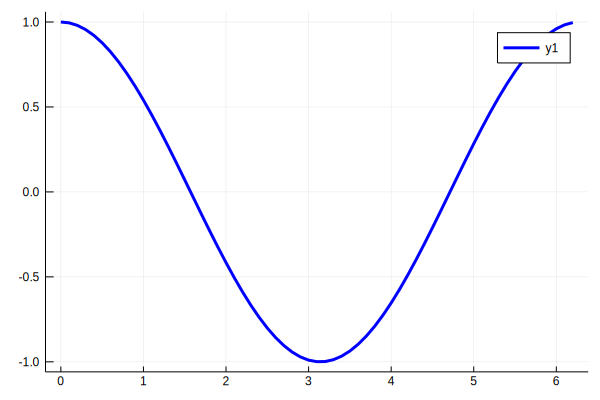

In [2]:
x = 0:0.1:2pi
y = cos.(x)
plot(x, y, c="blue", linewidth=3)

Una mas compleja: Dos lineas y opciones en los ejes

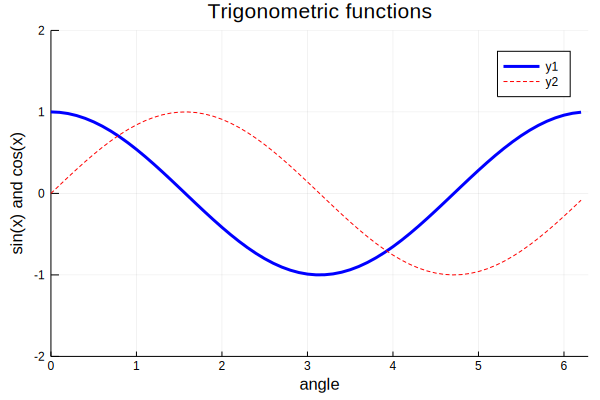

In [3]:
# Primero, usamos plot para construir la figura base
x = 0:0.1:2pi
y1 = cos.(x)
y2 = sin.(x)
plot(x, y1, c="blue", linewidth=3,reuse=false);

# Luego el comando plot! para mutar la figura existente
# Aca lo hemos usado para añadir una linea
plot!(x, y2, c="red", line=:dash)

# Podemos usar argumentos como "title" y "xlabel" para controlar los ejes
title!("Trigonometric functions")
xlabel!("angle")
ylabel!("sin(x) and cos(x)")

# Tambien podemos usar plot! de nuevo para hacer cosas como ajustar los ejes
plot!(xlims=(0,2π ), ylims=(-2, 2))

Otra alternativa es:

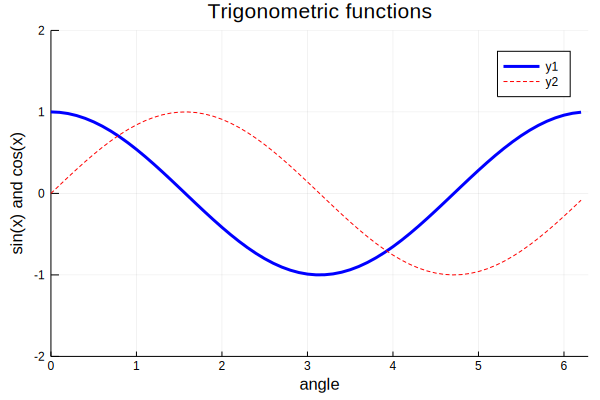

In [4]:
x = 0:0.1:2pi
y1 = cos.(x)
y2 = sin.(x)
plot(x, y1, 
    c="blue", 
    linewidth=3, 
    title="Trigonometric functions",
    xlabel="angle",
    ylabel="sin(x) and cos(x)"
)
plot!(x, y2, c="red", line=:dash)
plot!(xlims=(0,2π ), ylims=(-2, 2))

Tambien podemos ingresar matrices en lugar de vectores, en cuyo caso, cada columna es interpretada como una serie

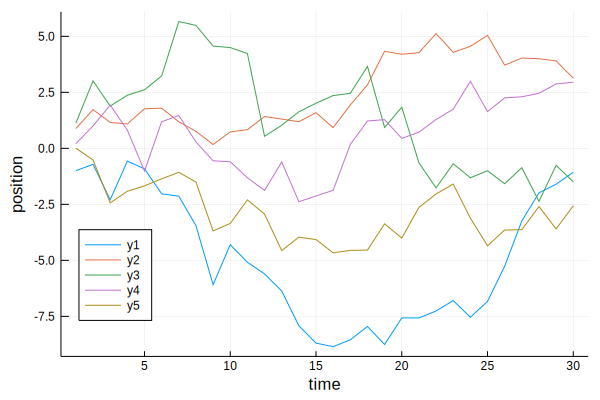

In [5]:
using Random
Random.seed!(2018)

time = 30
y1 = cumsum(randn(time))
y2 = cumsum(randn(time))
y3 = cumsum(randn(time))
y4 = cumsum(randn(time))
y5 = cumsum(randn(time))
Y  = [y1 y2 y3 y4 y5]

plot(1:time,Y,
    xlabel="time",
    ylabel="position",
    label=["y1" "y2" "y3" "y4" "y5"],
    leg=:bottomleft
)

Otro ejemplo del "multiple dispatching" de Julia: Si usamos como argumento una funcion en lugar de una serie de 
de datos, Julia grafica la funcion en un rango dado

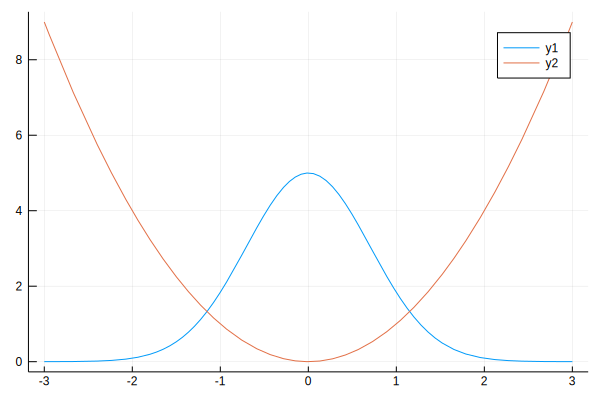

In [6]:
f(x) = 5exp(-x^2)
g(x) = x^2
plot([f, g], -3, 3)

Tambien funciona:

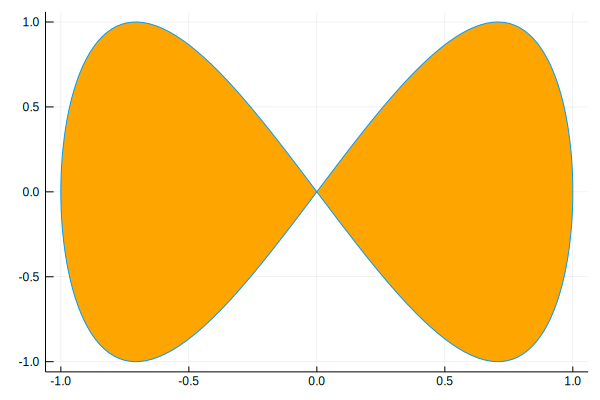

In [7]:
xₜ(t) = sin(t)
yₜ(t) = sin(2t)
plot(xₜ, yₜ, 0, 2π, leg=false, fill=(0,:orange))

Facil de extender a 3 dimensiones

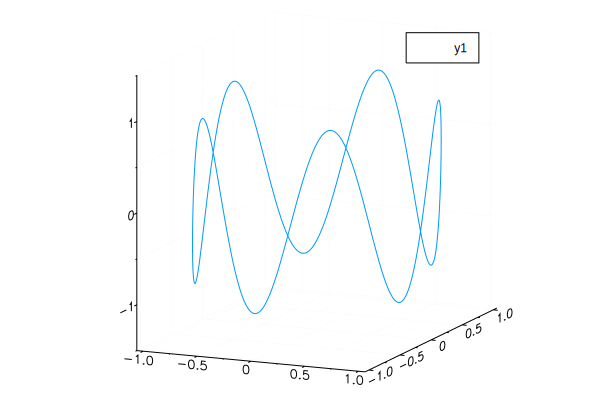

In [8]:
t = range(0, stop=10, length=1000)
x = cos.(t)
y = sin.(t)
z = sin.(5t)
plot(x, y, z)

# Scatters

Por supuesto que Julia hace Scatters

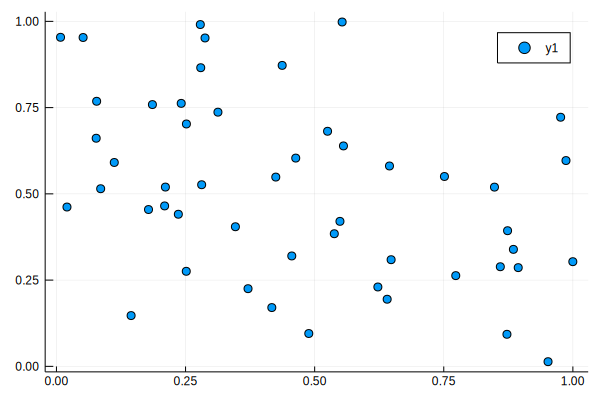

In [9]:
Random.seed!(1)
n = 50
x = rand(n)
y = rand(n)
scatter(x, y) 

De forma alterativa, podemos usar el comando "plot"

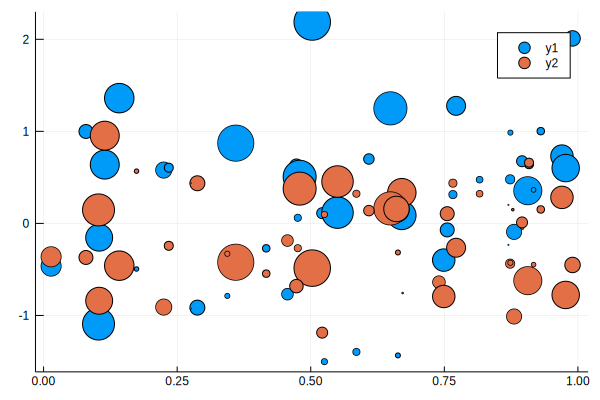

In [10]:
n = 50
x = rand(n)
y = randn(n)
z = randn(n)*0.5
ms = rand(50) * 20
plot(x, [y z], seriestype=:scatter, markersize=ms) 

Hacer scatterplots en 3D es igual de facil"

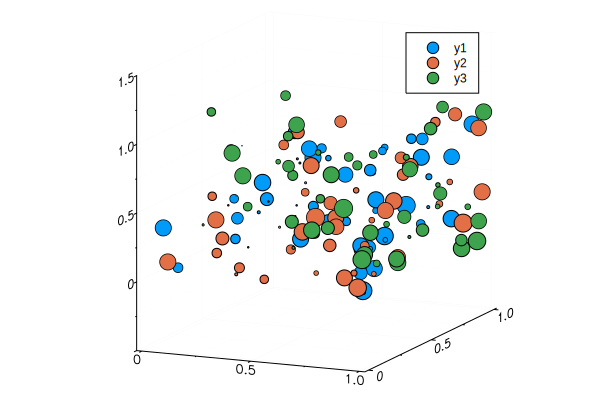

In [11]:
n = 50
x = rand(n)
y = rand(n,3)
z = rand(n,3)
ms = rand(50) * 10
scatter(x, y, z, markersize=ms)

Uno mas bonito

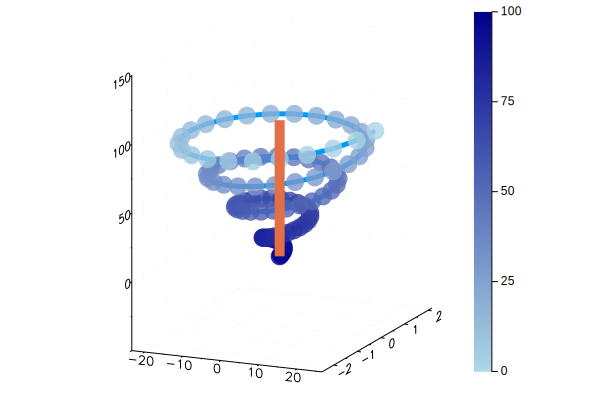

In [12]:
n = 100
ts = range(0, stop=8π, length=n)
x = ts .* map(cos, ts)
y = (0.1ts) .* map(sin, ts)
z = 1:n
plot(x, y, z, 
    zcolor=reverse(z),
    m=(10, 0.8, :blues, Plots.stroke(0)), 
    leg=false,
    cbar=true,
    w=5
)
plot!(zeros(n), zeros(n), 1:n, w=10)

Podemos combinarlo con plot() para hacer figuras sofisticadas

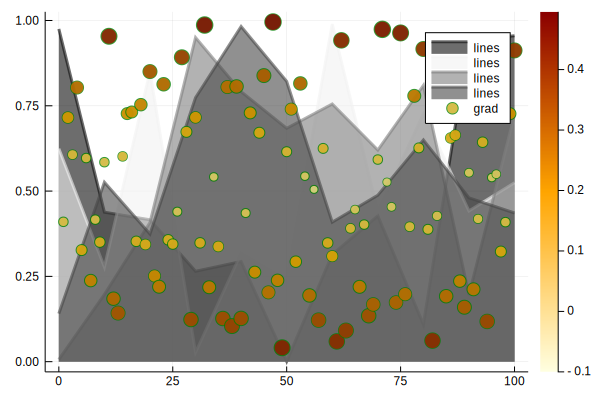

In [13]:
x = 0:10:100
y = rand(11, 4)
z = rand(100)
plot(x, y, lab="lines", w=3, palette=:grays, fill=0, α=0.6)
scatter!(z,
    zcolor=abs.(z .- 0.5),
    m=(:heat, 0.8, Plots.stroke(1, :green)), 
    ms=10 * abs.(z .- 0.5) .+ 4,
    lab="grad"
)

Muchas funciones de esta libreria tienen comportamiento similar

# Histogramas

Igual de facir es hacer histogramas:

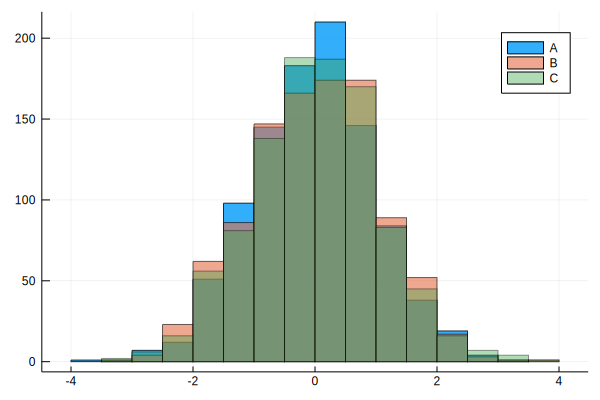

In [14]:
Random.seed!(1)
x = randn(1000)
y = randn(1000)
z = randn(1000)
histogram( x, bins=20, α=0.8, label="A")
histogram!(y, bins=20, α=0.6, label="B")
histogram!(z, bins=20, α=0.4, label="C")

# Anotaciones

Podemos usar annotate!() como funcion y seties_annotatios como argumento para añadir texto a nuestras figuras

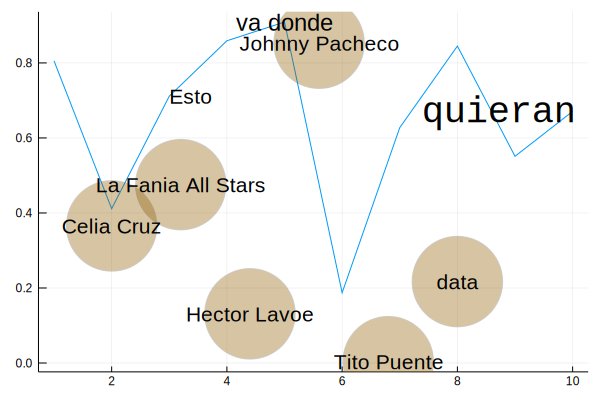

In [15]:
y = rand(10)
plot(y, annotations=(3, y[3], Plots.text("Esto", :left)), leg=false)
annotate!([(5, y[5],Plots.text("va donde", 16, :center)),(10, y[10], Plots.text("quieran", :right, 20, "courier"))])
scatter!(range(2, stop=8, length=6),rand(6),
        marker=(50, 0.2, :orange),
        series_annotations=["Celia Cruz", "La Fania All Stars", "Hector Lavoe", "Johnny Pacheco", "Tito Puente", 
        Plots.text("data", :green)]
)

# Barras

Podemos hacer barras sencillas

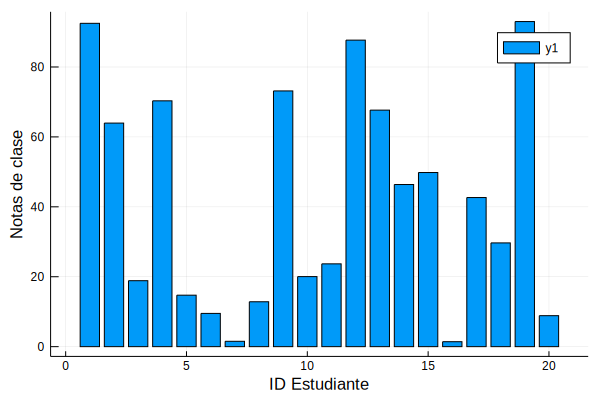

In [16]:
x = 1:20
y = rand(20)*100
bar(x,y)
xlabel!("ID Estudiante")
ylabel!("Notas de clase")

O amontonadas

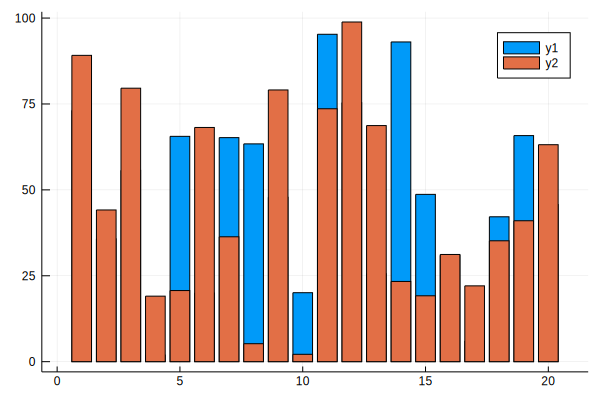

In [17]:
x = 1:20
y = rand(20)*100
z = rand(20)*100
bar(x,[y z])

Y de lado

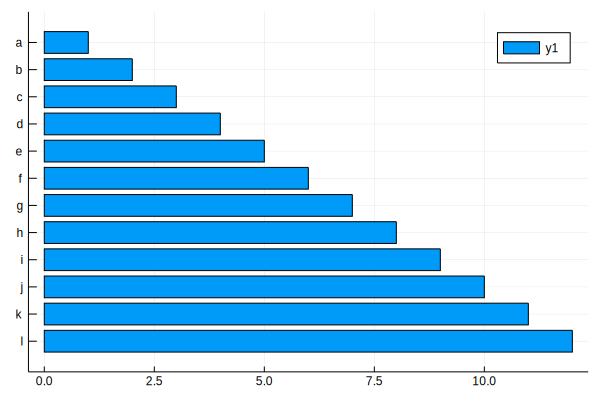

In [18]:
ticklabel = string.(collect('a':'l'))
bar(1:12, orientation=:h,
          yticks=(1:12, ticklabel),
          yflip=true
)

# Contornos

Podemos hacer contornos a lo Matlab

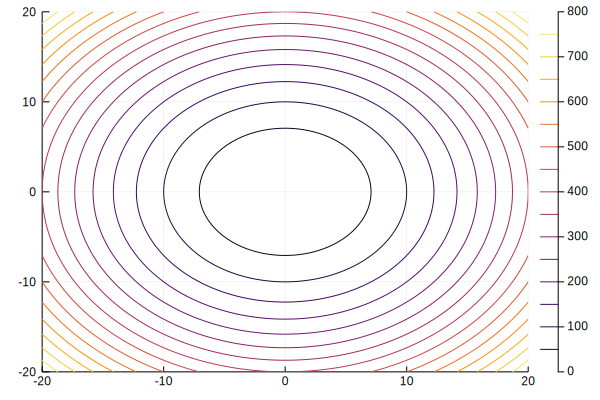

In [19]:
f(x,y) = x^2 + y^2
xNodes = range(-20, 20, length=101) 
yNodes = range(-20, 20, length=101) 
xGrid = repeat(xNodes, 1, 101)
yGrid = repeat(yNodes, 1, 101)'
zGrid = f.(xGrid, yGrid)
contour(xNodes,yNodes,zGrid)

O a lo Julia

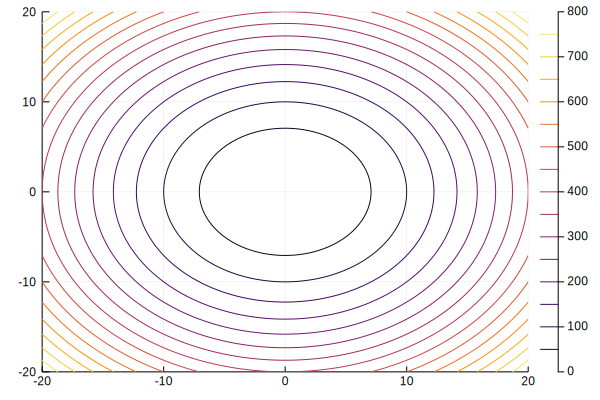

In [20]:
x = y = range(-20, 20, length = 101)
contour(x, y, (x, y) -> x^2 + y^2)

# Superficies

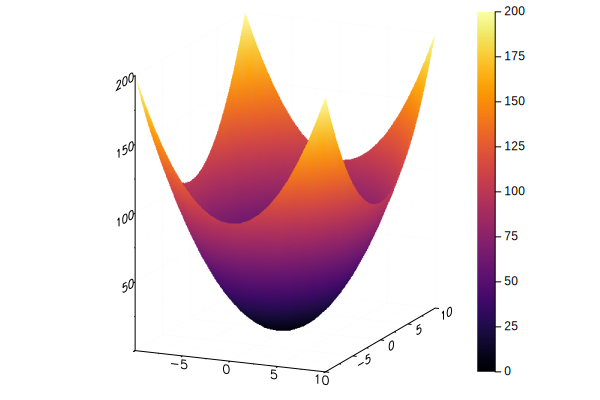

In [21]:
f(x,y) = x^2 + y^2
x = -10:10
y = x
surface(x, y, f)

O, de forma alternativa

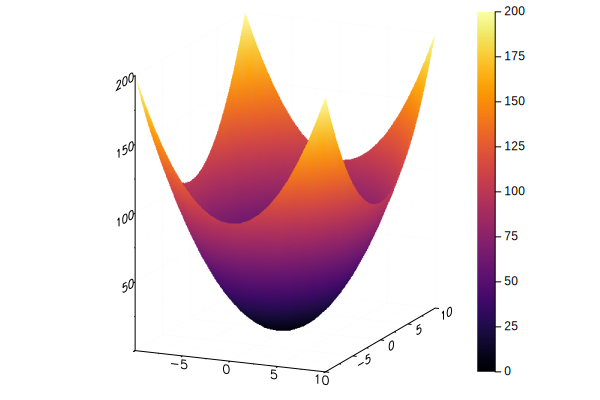

In [22]:
plot(x, y, f, linetype=:surface)

# Subfiguras

Podemos crear multiples figuras y añadirlas en una sola

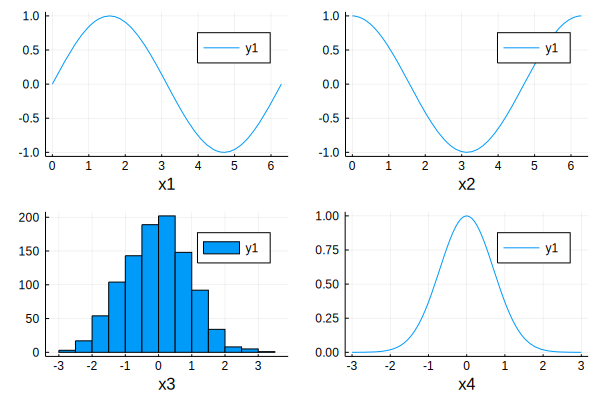

In [23]:
fig1 = plot(sin, 0, 2pi, xlabel="x1");
fig2 = plot(cos, 0, 2pi, xlabel="x2");
fig3 = histogram(randn(1000), xlabel="x3");
fig4 = plot(x->exp(-x^2), -3, 3, xlabel="x4");
plot(fig1, fig2, fig3, fig4)

Podemos usar la opcion layout para controlar el grid

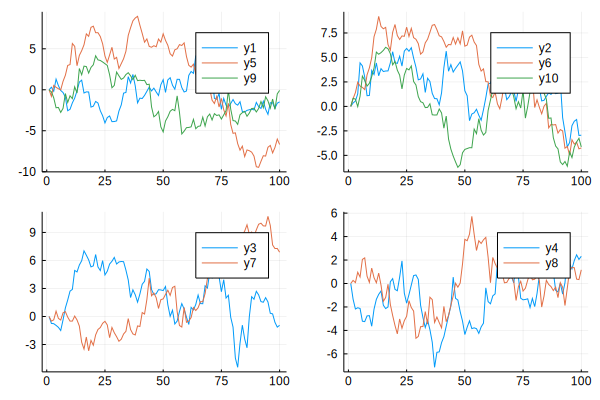

In [24]:
yPlot = Plots.fakedata(100, 10) 
plot(yPlot,layout=4)

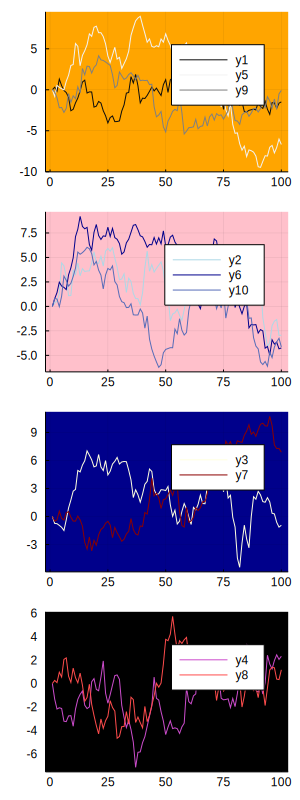

In [25]:
plot(yPlot,layout=(4,1),size=(300, 800),
    palette=[:grays :blues :heat :lightrainbow], 
    bg_inside=[:orange :pink :darkblue :black]
)

Podemos usar la macro @layout para crear algunas mas complejas

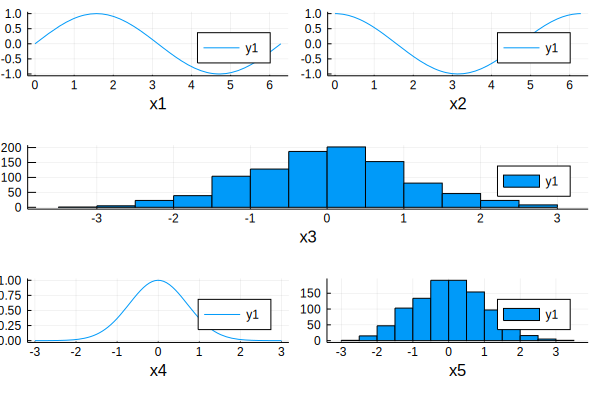

In [26]:
fig1 = plot(sin, 0, 2pi, xlabel="x1");
fig2 = plot(cos, 0, 2pi, xlabel="x2");
fig3 = histogram(randn(1000), xlabel="x3");
fig4 = plot(x->exp(-x^2), -3, 3, xlabel="x4");
fig5 = histogram(randn(1000), xlabel="x5");
l = @layout [a b; c ; d e]
plot(fig1, fig2, fig3, fig4, fig5, layout=l)

Otro ejemplo mas:

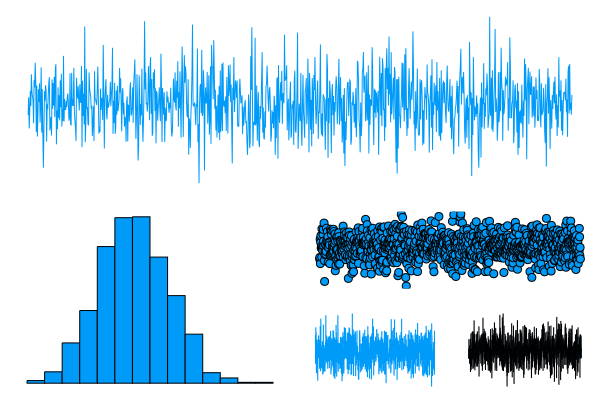

In [27]:
yPlot = randn(1000,5)
l = @layout [a; b [c; d e] ]
plot(yPlot,
     layout=l, 
     t=[:line :histogram :scatter :steppre :bar], 
     leg=false,
     ticks=nothing,
     border=:none
)

Un cheatsheet de una pagina se puede consultar en: https://github.com/sswatson/cheatsheets/blob/master/plotsjl-cheatsheet.pdf


- Plots en realidad no es una libreria para graficar
    - Es una libreria que permite invocar, con una misma sintaxis, diferentes librerias diseñadas para hacer figuras
- Hemos estado usando una de estas, GR, que hemos invocado al inicio con el comando gr()
- Cada "backend" tiene ventajas y desventakas. Estas son algunas de estas con sus ventajas, segun el mismo manual de Plots

In [28]:
#=
Si quiere...	 .   .. entonces use...
features	         PyPlot, Plotly(JS), GR
speed                GR, InspectDR
interactivity	     Plotly(JS), PyPlot, InspectDR
beauty      	     Plotly(JS), PGFPlots
REPL Plotting	     UnicodePlots
3D plots	         PyPlot, GR, Plotly(JS)
a GUI Window	     GR, PyPlot, PlotlyJS, InspectDR
a small footprint	 UnicodePlots, Plotly
plot+data -> .hdf5   file	HDF5
=#

- Puede consultar mas en: http://docs.juliaplots.org/latest/backends/
- PyPlot, en particular, es un wrapper de la libreria matplotbib() de Python
- Se puede invocar usando pyplot()

# Exportar Figuras

Podemos usar savefig para guardar la figura actual

In [29]:
savefig("FiguraSofisticada.png") # Saves the CURRENT_PLOT as a .png

O añadiendo el nombre de alguna figura

In [30]:
savefig(fig1,"LineaSimple.pdf") 

In [31]:
#= Dependiendo del "backend", se puede guardar en los siguientes formatos:
formato  backend
eps	     inspectdr, plotlyjs, pyplot
html	 plotly, plotlyjs
pdf	     gr, inspectdr, pgfplots, plotlyjs, pyplot
png	     glvisualize, gr, inspectdr, plotly, plotlyjs, pyplot
ps	     gr, pyplot
svg	     gr, inspectdr, pgfplots, plotly, plotlyjs, pyplot
tex	     pgfplots
text	 hdf5, unicodeplots
=#

# Recetas y Curiosidades

Algunas librerias como StatsPlots incluyen "recetas" para usar con la libreria Plots

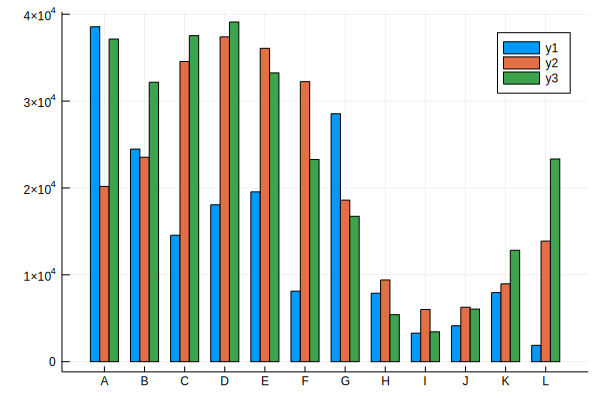

In [32]:
#Pkg.add("StatsPlots")
using StatsPlots
measles = [38556, 24472, 14556, 18060, 19549, 8122, 28541, 7880, 3283, 4135, 7953, 1884]
mumps = [20178, 23536, 34561, 37395, 36072, 32237, 18597, 9408, 6005, 6268, 8963, 13882]
chickenPox = [37140, 32169, 37533, 39103, 33244, 23269, 16737, 5411, 3435, 6052, 12825, 23332]
ticklabel = string.(collect('A':'L'))
groupedbar([measles mumps chickenPox], bar_position = :dodge, bar_width=0.7, xticks=(1:12, ticklabel))

Estas permiten graficar otro tipo de datos como DataFrames y Tablas usando la macro @df

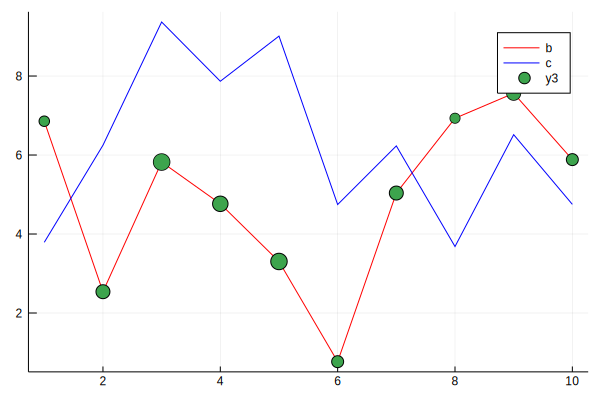

In [33]:
using DataFrames, StatsPlots
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10))
# Graficar desde un Dataframe
@df df plot(:a, [:b :c], colour = [:red :blue])
@df df scatter!(:a, :b, markersize = 4 .* log.(:c .+ 0.1))

Se puede combinar con otras librerias como Query para filtrar y graficar datos de forma rapida

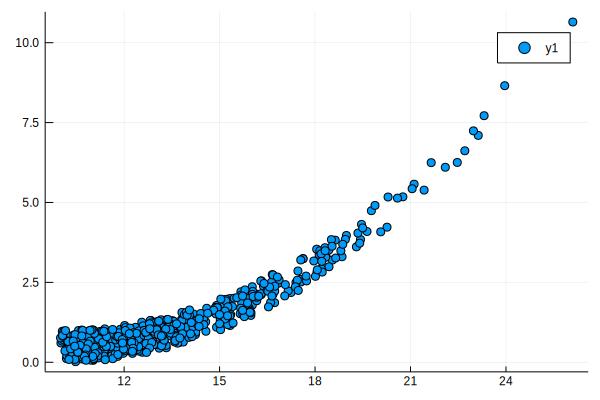

In [34]:
#Pkg.add("Query")
using Query, StatsPlots,DataFrames
n = 1000 
x = randn(n)
y = 10 .+ 5x
z = x.^2 
w = rand(n)
datosHayQueDarlos = DataFrame(Var1=x,Var2=y,Var3=z,Var4=w)
datosHayQueDarlos |>
    @filter(_.Var1 .> 0) |>
    @map({_.Var2, newVar = _.Var3+_.Var4}) |>
    @df scatter(:Var2, :newVar)

Finalmente, nos probee con otros tipos de figuras como los kernels

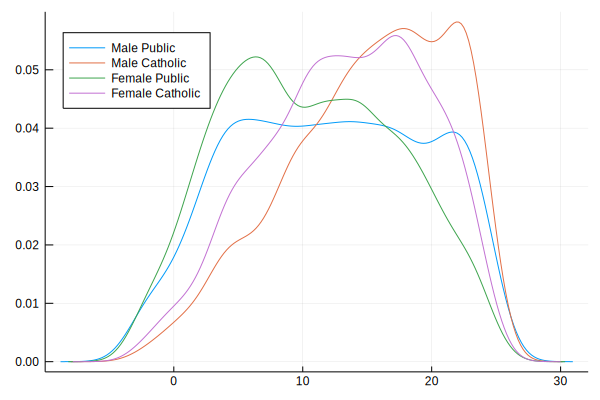

In [35]:
# Pkg.add("RDatasets")
using RDatasets
school = RDatasets.dataset("mlmRev","Hsb82")
@df school density(:MAch, group = (:Sx, :Sector), legend = :topleft)

Podemos usar la macro GIF para crear animaciones!

┌ Info: Saved animation to 
│   fn = C:\Users\agutieda\Dropbox\WorkDesk\MSD-PES-Guatemala 2020\Part 2 - Introduction to Julia\2 - Learn Julia\5 - Graphs\tmp.gif
└ @ Plots C:\Users\agutieda\.juliapro\JuliaPro_v1.2.0-2\packages\Plots\2KhB2\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\agutieda\\Dropbox\\WorkDesk\\MSD-PES-Guatemala 2020\\Part 2 - Introduction to Julia\\2 - Learn Julia\\5 - Graphs\\tmp.gif")
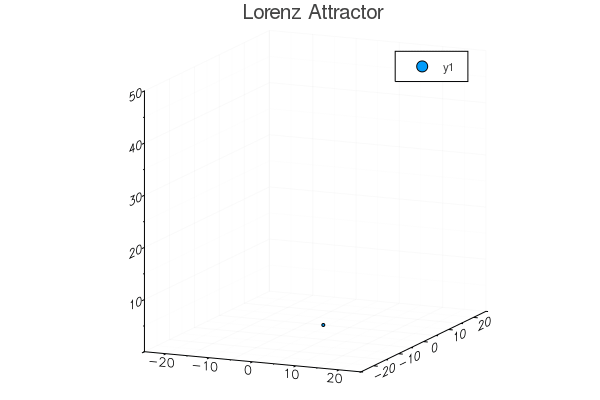

In [36]:
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end
attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

# Otras Librerias

- Uno de los puntos flojos de Julia es el tiempo que toma compilar una figura
- La primera que se corre el codigo de una figura, puede tomar bastante mientras esta compila
- Luego, el tiempo es menor. Pero no insignificativo
- Existe la posibilidad de compilar una version de Julia para acelerar este paso, pero es un proceso todavia experimental: https://github.com/JuliaLang/PackageCompiler.jl
- Una de ellas es Makie, que se presenta como una alternativa a Plots y utiliza el GPU para acelerar la produccion de graficas:https://github.com/JuliaPlots/Makie.jl
- Finalmente, tambien esta disponible Gadfly, que se basa en la "gramatica de las graficas" y se plantea como una alternativa a ggplot2 en R: https://github.com/GiovineItalia/Gadfly.jl